<a href="https://colab.research.google.com/github/drewm8080/ITP-449-Lectures/blob/main/ITP449_TimeSeries_Student_Notebook_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series:**


Time series is a sequence of observations of categorical or numeric variables indexed by a date, or timestamp.

Examples are: stock price, climate data, Google trends

Fixed frequency – Data points occur at regular intervals according to some rule

Timestamp – specific instance in time

Fixed periods – logical period of time such as the month January 2007 or the full year 2010

Intervals of time – indicated by a start and end timestamp. (Periods can be thought of as special cases of intervals)

# Datetime

The datetime module supplies classes for manipulating dates and times.

In [ ]:
from datetime import datetime #to manually create dates
print(datetime(2017,2,1))


In [ ]:
# Get current date and time
now = datetime.now()
print('Timestamp:\tYear-Day-Month HH:MM:SS:MS\n\t\t\t', now)

print('Year:', now.year)
print('Month:', now.month)
print('Day:', now.day)

# Difference between dates
delta = datetime(2020, 9, 23) - datetime(2020, 7, 4, 11, 45, 23)
print('Difference in days:', delta.days)
print('Difference in seconds:', delta.seconds)

In [ ]:
# Formatting and Conversion

stamp = datetime(2020, 10, 18)
print('Date as string:', str(stamp))
print('Date as formatted string (American):', stamp.strftime('%Y-%d-%m'))
print('Date as formatted string (British):', stamp.strftime('%Y-%m-%d'))

dateString = '2020-18-10'
print('String to date:', datetime.strptime(dateString, '%Y-%d-%m'))

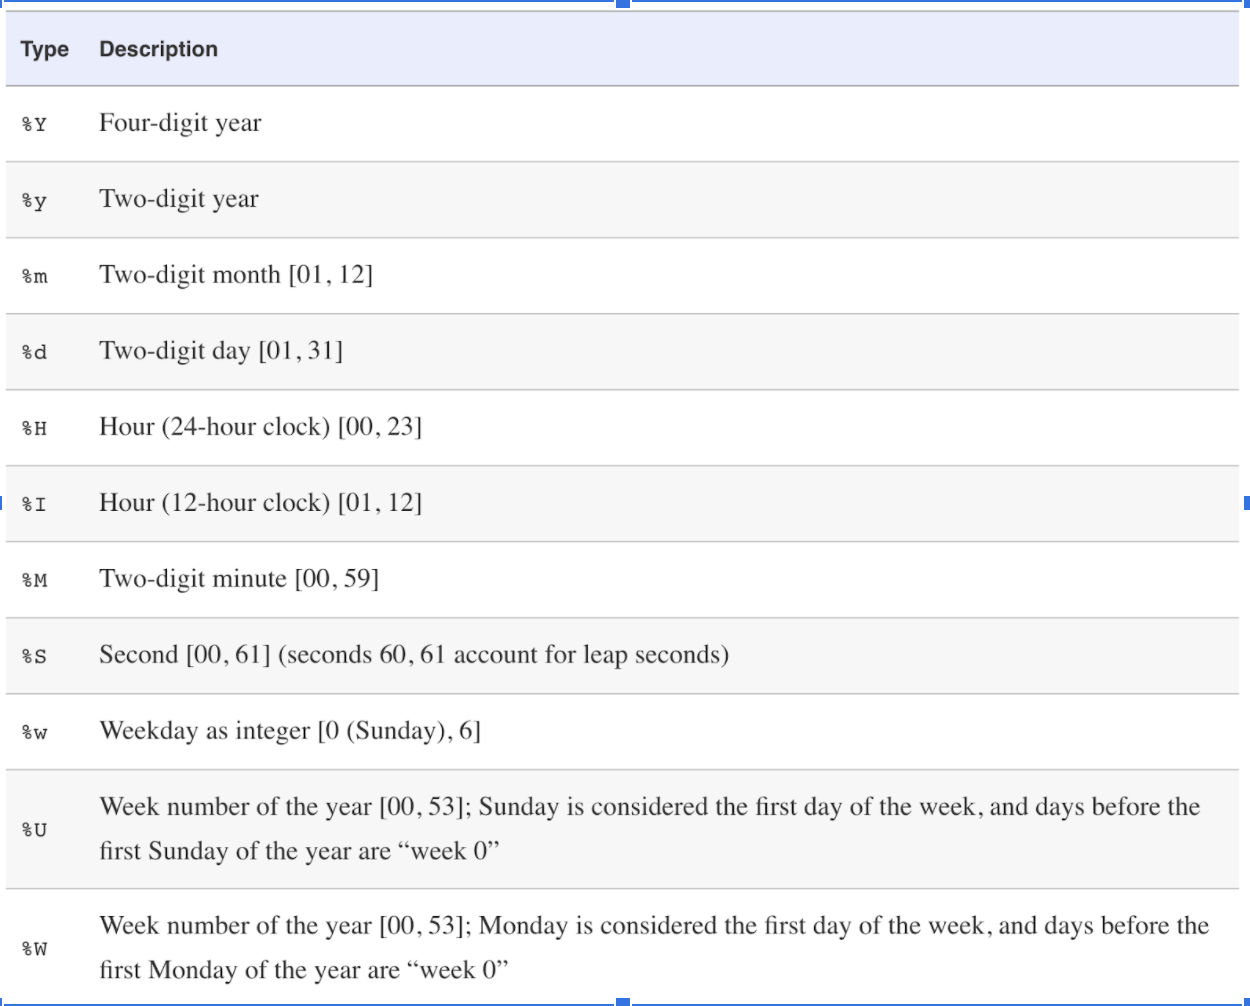

# Timestamp

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. It’s the type used for the entries that make up a DatetimeIndex, and other timeseries oriented data structures in pandas.

**Basic Building Block: pd.Timestamp**

In [ ]:
import pandas as pd


time_stamp = pd.Timestamp(datetime(2017,1,1))
print(time_stamp)
#time has been automaticly set to midnight

In [ ]:
pd.Timestamp('2017-01-01') == time_stamp
#datetime is a string

True

Timestamp object has many attributes to store time-specific information

In [ ]:
time_stamp.year

In [ ]:
print(time_stamp.month)
print(time_stamp.month_name())

In [ ]:
time_stamp.day_name()

# Period and Frequency

The period object always has a frequency, with months as the default. It also has a method to convert between frequencies, for instance from monthly to daily frequency. You can convert a period to a timestamp object, and a timestamp back to a period object. You can also do basic date arithmetic.

**Basic Building Block: pd.Period and freq**

In [ ]:
period = pd.Period('2017-01')
period

#default: month-end

In [ ]:
#convert to daily
period.asfreq('D')

In [ ]:
#convert a period to a timestamp object
ts = period.to_timestamp()
ts

In [ ]:
#convert a timestamp object to a period object
time_stamp = pd.Timestamp(datetime(2017,1,1))
time_stamp.to_period('M')

**Frequency info enables basic data arithmetic**

In [ ]:
period = pd.Period('2017-01')
period + 1

In [ ]:
(pd.Period('2017-01')+ 1).asfreq('D')

# Sequence of dates and times

To create a time series, we need a sequence of dates. 

To create a sequence of Timestamps, use the pandas function date_range. You need to specify a start date, and either and end date, or a number of periods. 

The default is daily frequency. 

The function returns the sequence of dates as a DateTimeindex with frequency information.

In [ ]:
index = pd.date_range(start='2017-1-1', periods=12, freq = 'M')
index

**pd.DatetimeIndex** is a sequence of Timestamps objects with frequency info

In [ ]:
index[0]

In [ ]:
index[1]

In [ ]:
#convert DatetimeIndex to period
index.to_period()

We can create a time series by setting the DateTimeIndex as the index of your DataFrame.

In [ ]:
pd.DataFrame(data=index)

In [ ]:
pd.DataFrame(data=index).info()

In [ ]:
# create 12 rows with 2 columns of random data to match the DateTimeindex
import numpy as np
data = np.random.random(size=(12,2))
print(data)

In [ ]:
index = pd.date_range(start='2017-1-1', periods=12, freq = 'M')
pd.DataFrame(data = data, index = index).info()

In [ ]:
df = pd.DataFrame(data = data, index = index)
df

In [ ]:
#access to the second column of the data frame
df.loc[:,1]

In [ ]:
# TIMESTAMP AS SERIES INDEX

dates = [datetime(2020, 9, 1),
         datetime(2020, 9, 8),
         datetime(2020, 9, 11),
         datetime(2020, 9, 15)]
ts = pd.Series(np.random.randn(4), index=dates)
print('Timestamp as Series Index:')
print(ts)
# Retrieving data w.r.t dates
print('Retrieve data for "2020, 9, 8":\t', ts['2020-09-08'])
print('Retrieve data for "2020/9/8":\t', ts['2020/09/08'])
print('Retrieve data for "9/8/2020":\t', ts['9/8/2020'])
print('Retrieve data for "20200908":\t', ts['20200908'])

dates = pd.date_range('2015/01/01', periods=40)
ts = pd.DataFrame(np.random.randn(40, 4), index=dates, columns=['A', 'B', 'C', 'D'])
print('\nRetrieve data for "02/2015":\n', ts.loc['02/2015'])

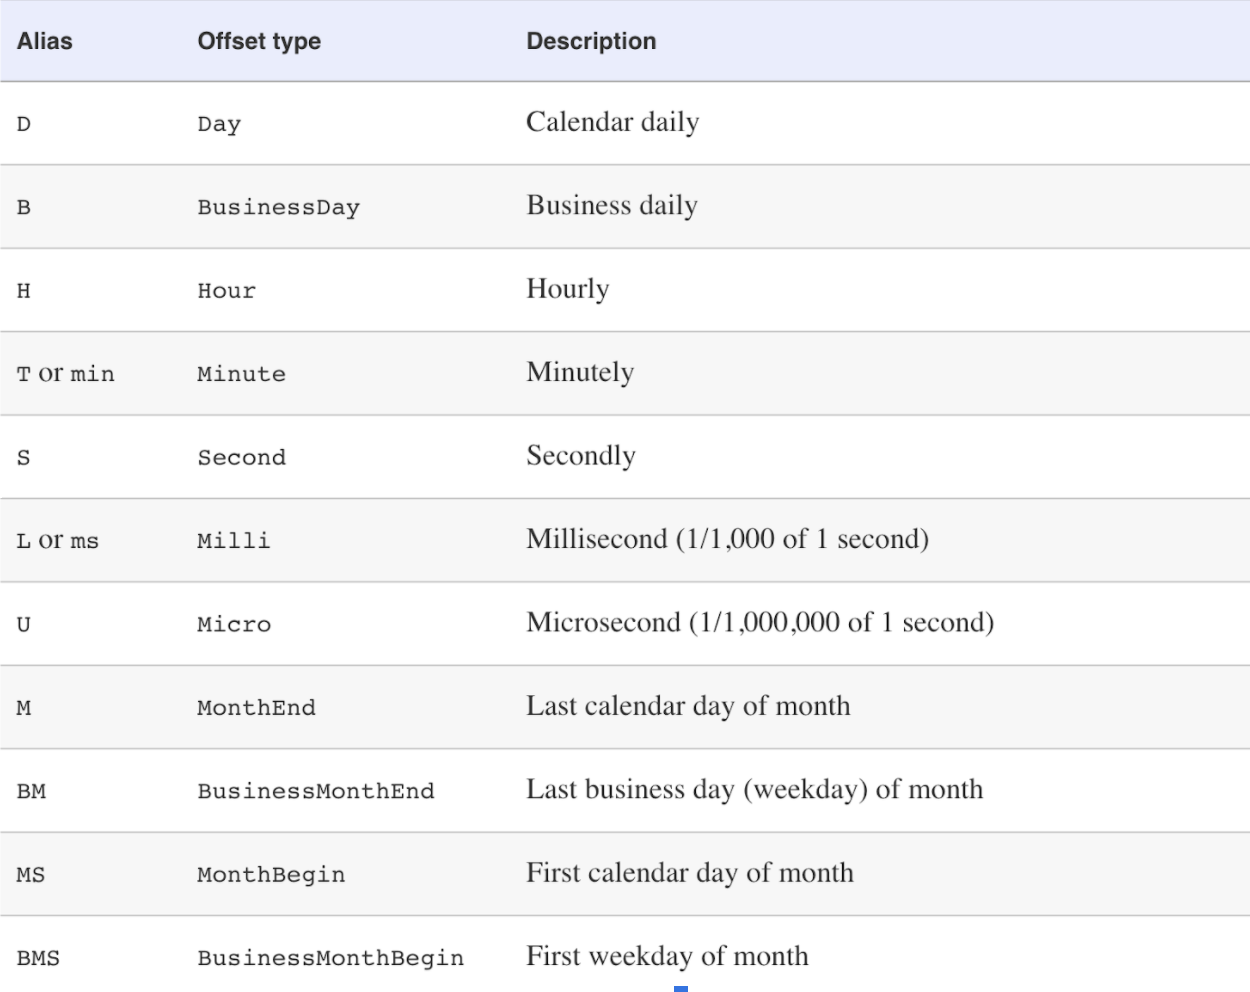

# Time Series Transformation

Basic time series transformation include:


*   Parsing string dates and convert to datetime64
*   Selecting and slicing for specific subperiods
*   Setting and changing DateTimeIndex frequency
    *   Upsampling: involves increasing the time frequency, which requires generating new data.
    *   Downsampling: decreasing the time frequency, which requires aggregating data

(Get the stocks.csv file from google drive)

In [ ]:
import pandas as pd

stock_data = pd.read_csv('stock.csv', index_col=0)
stock_data.info()

In [ ]:
stock_data.head()

In [ ]:
#Converting string dates to datetime64
stock_data.date = pd.to_datetime(stock_data.date)
stock_data.info()

In [ ]:
#Set date into index
stock_data.set_index('date', inplace = True)
#incplace: do not create a copy
stock_data.info()

In [ ]:
stock_data.head()

**Plotting the stock price time series**

In [ ]:
import matplotlib.pyplot as plt
stock_data.price.plot(title = "Stock Price")
plt.tight_layout()
plt.show()

In [ ]:
stock_data['2018'].info()

In [ ]:
stock_data['2018-02'].info()

In [ ]:
stock_data.loc['2018-01-25', 'price']

**Set Frequency**: 

In [ ]:
#Convert DateTimeIndex to calendar day frequency
#upsampling =>higher frequency implies new data => missing data
stock_data.asfreq('D').info()

#2018-01-03 and 2018-01-04 are added

In [ ]:
stock_data.head()

**Reset Frequency:**

In [ ]:
#Convert DateTimeIndex to business day frequency
stock = stock_data.asfreq('B')
stock.info()

In [ ]:
#select the missing values and check which dates are considered business days, 
#but have no stock prices because no stocks were traded.

stock[stock.price.isnull()]


# Example 

Download VDayTrends.csv file from google drive, read the file and do the following:
* 1) Display the column and row information and the first 5 rows.
* 2) Convert the Month column to a DateTime data type. Set the Month column as the DataFrame index.


In [ ]:
#1
dfVDayTrends = pd.read_csv('VDayTrends.csv')
print(dfVDayTrends.info())
print(dfVDayTrends.head())

#2
dfVDayTrends['Month'] = pd.to_datetime(dfVDayTrends['Month'])
dfVDayTrends.set_index('Month', inplace=True)

**Plotting the data**

* 3) Plot the data as two line plots on the same figure. The x-axis represents the time while the y-axis represents the popularity of each term. Include a legend and titles for the axes.
* 4) Plot the data for only the search term ‘Lonely’. The x-axis represents the time while the y-axis represents the popularity of the term. Include a legend and titles for the axes.



In [ ]:
#3
import matplotlib.pyplot as plt

dfVDayTrends.plot(figsize=(8, 3), linewidth=2, fontsize=10)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.show()

#4
Lonely = dfVDayTrends['Lonely']
Lonely.plot(figsize=(8, 3), linewidth=2, fontsize=10)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.legend()
plt.show()

**Smoothing function**

* 5) Plot the data for only the search term ‘Lonely’ and apply a smoothing function to it. The x-axis represents the time while the y-axis represents the popularity of the term. Include a legend and titles for the axes.
* 6) Plot the data for only the search term ‘Tinder’ and apply a smoothing function to it. The x-axis represents the time while the y-axis represents the popularity of each term. Include a legend and titles for the axes.
* 7) Plot the smoothed lines for both search terms on a single figure.

In [ ]:
#5
Lonely = dfVDayTrends['Lonely']
Lonely.rolling(12).mean().plot(figsize=(8, 3), linewidth=2, fontsize=10)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.legend()
plt.show()

#6
Tinder = dfVDayTrends['Tinder'].rolling(12).mean()
Tinder.plot(figsize=(8, 3), linewidth=2, fontsize=10)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.legend()
plt.show()

#7
Lonely = dfVDayTrends['Lonely'].rolling(12).mean()
Tinder = dfVDayTrends['Tinder'].rolling(12).mean()
dfNew = pd.concat([Lonely, Tinder], axis=1)
# print(dfNew)
dfNew.plot(figsize=(8, 3), linewidth=2, fontsize=10)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.legend()
plt.show()

# Exercise

1. Write a program that takes your birthdate as input and outputs your age in days:

In [ ]:
# Type your solution here



 
2.  
* 2.1 Create seven dates starting from '2019-1-1' at (default) daily frequency. Assign the result to seven_days.

* 2.2 Iterate over each date in seven_days and in each iteration, print the dayofweek and weekday.

In [ ]:
import pandas as pd

# 2.1 Type your solution here
# Create the range of dates here


In [ ]:
# 2.2 Type your solution here

3. Given the below dataframe related to air quality data.
*   3.1. Set date column as index
*   3.2. Inspect dataframe using .info() and .head()
*   3.3. Plot dataframe using subplots=True





In [ ]:
import numpy as np

date = pd.date_range(start='2018-1-1', periods=500, freq = 'D')
ozon = np.random.random(size=500)
pm25 = np.random.uniform(0, 50, 500)
co = np.random.uniform(0, 2.5, 500)

data = {"date": list(date), "ozon": list(ozon), "pm25": list(pm25), "co": list(co)}
df = pd.DataFrame(data, columns= ["date", "ozon", "pm25", "co"])


In [ ]:
# 3.1 Type your solution here


In [ ]:
#3.2 Type your solution here


In [ ]:
#3.3 Type your solution here



# Data Visualization Excercise (take home)

Download the given 02/18 and 07/18 CSV files of CitiBike data from google drive and do the following:

The data consists of 
* Trip Duration(seconds), 
* Start Time and Date, 
* Stop Time and Date, 
* Start Station Name, 
* Stop Station Name, 
* Station ID, 
* Station Lat/Long, 
* Bike ID, 
* User Type(Customer=24-hour pass or 3-day pass user, Subscriber=Annual Member), 
* Gender(Zero=unknown, 1=male, 2=female), 
* Year of Birth

(For more information, you can visit https://s3.amazonaws.com/tripdata/index.html)

1. Create two DataFrame variables containing the CitiBike data from the 02/18 and 07/18 CSV files.

2. Create two ndarray variables for trip duration (in minutes) from 02/18 and 07/18.

3. Create a figure of 2 x 1 subplots that displays the histograms (distribution) of the trip durations from 02/18 and 07/18.

4. Scale the histograms to display more details (more bins).

5. Create a figure of 2 x 1 subplots that displays the histograms (distribution) of the trip durations for subscribers and customers from 02/18.

6. Create a figure of 2 x 1 subplots that displays the histograms (distribution) of the trip durations for subscribers and customers from 07/18.

7. Scale the 07/18 histograms so that the y axis range is from 0 to 250,000 for both plots.


In [ ]:
# Type your solution here 
